## customer-revenue-prediction

#### In this competition, you’re challenged to analyze a Google Merchandise Store (also known as GStore, where Google swag is sold) customer dataset to predict revenue per customer. Hopefully, the outcome will be more actionable operational changes and a better use of marketing budgets for those companies who choose to use data analysis on top of GA data.

### What am I predicting?
#### We are predicting the natural log of the sum of all transactions per user. Once the data is updated, as noted above, this will be for all users in test_v2.csv for December 1st, 2018 to January 31st, 2019. For every user in the test set, the target is:
#### yuser=∑i=1ntransactionuseri
#### targetuser=ln(yuser+1)
#### Note that the dataset does NOT contain data for December 1st 2018 to January 31st 2019. You must identify the unique fullVisitorIds in the provided test_v2.csv and make predictions for them for those unseen months.

### File Descriptions
#### Note: These have not yet been updated, per the "Important Note" above.

#### **train_v2.csv** - the updated training set - contains user transactions from August 1st 2016 to April 30th 2018.
#### **test_v2.csv** - the updated test set - contains user transactions from May 1st 2018 to October 15th 2018.
#### **sample_submission_v2.csv** - a updated sample submission file in the correct format. Contains all fullVisitorIds in test_v2.csv. Your submission's PredictedLogRevenue column should make forward-looking predictions for each of these fullVisitorIds for the timeframe of December 1st 2018 to January 31st 2019. Review "What am I predicting?" above for details.




### Data Fields

1- fullVisitorId- A unique identifier for each user of the Google Merchandise Store.

2- channelGrouping - The channel via which the user came to the Store.

3- date - The date on which the user visited the Store.

4- device - The specifications for the device used to access the Store.

5- geoNetwork - This section contains information about the geography of the user.

6- socialEngagementType - Engagement type, either "Socially Engaged" or "Not Socially Engaged".

7- totals - This section contains aggregate values across the session.

8- trafficSource - This section contains information about the Traffic Source from which the session originated.

9- visitId - An identifier for this session. This is part of the value usually stored as the _utmb cookie. This is only unique to the user. For a 
completely unique ID, you should use a combination of fullVisitorId and visitId.

10- visitNumber - The session number for this user. If this is the first session, then this is set to 1.

11-visitStartTime - The timestamp (expressed as POSIX time).

12- hits - This row and nested fields are populated for any and all types of hits. Provides a record of all page visits.

13- customDimensions - This section contains any user-level or session-level custom dimensions that are set for a session. This is a repeated field and has an entry for each dimension that is set.

14- totals - This set of columns mostly includes high-level aggregate data.

The 'parse' function to flatten JSON columns have been created


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.io.json import json_normalize 
import json

In [2]:
#import csv
train = pd.read_csv('./data/train.csv',engine ='python', error_bad_lines=False,parse_dates=['date'])
#note:-
#parse_dates=['date']
#ParserError: Error tokenizing data. C error: EOF inside string starting at line pandas
#ParserError: unexpected end of data


Skipping line 421731: unexpected end of data


#### sep defult (,) c engine doesn't read (,)
#### python engine read (,) 
#### delimiter :- Alternative argument name for sep 

In [3]:
train.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,2016-09-02,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,1,1472830385
1,Organic Search,2016-09-02,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472880147,1,1472880147
2,Organic Search,2016-09-02,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3895546263509774583,"{""continent"": ""Europe"", ""subContinent"": ""South...",3895546263509774583_1472865386,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472865386,1,1472865386
3,Organic Search,2016-09-02,"{""browser"": ""UC Browser"", ""browserVersion"": ""n...",4763447161404445595,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",4763447161404445595_1472881213,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472881213,1,1472881213
4,Organic Search,2016-09-02,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",27294437909732085,"{""continent"": ""Europe"", ""subContinent"": ""North...",27294437909732085_1472822600,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472822600,2,1472822600


## Clean Data 

In [4]:
train.shape

(421729, 12)

### **Convert visitStartTime to datatime**

In [5]:
train['visitStartTime']= pd.to_datetime(train['visitStartTime'],unit='s')

In [6]:
train.dtypes

channelGrouping                 object
date                    datetime64[ns]
device                          object
fullVisitorId                   object
geoNetwork                      object
sessionId                       object
socialEngagementType            object
totals                          object
trafficSource                   object
visitId                          int64
visitNumber                      int64
visitStartTime          datetime64[ns]
dtype: object

### change type visitId to Object

In [7]:
train['visitId']=train['visitId'].astype(str)

In [8]:
train['visitId'].dtype

dtype('O')

#### Columns json (device,geoNetwork,trafficSource,totals )
**use json_loads**

In [9]:
device = pd.DataFrame(train['device'].apply(json.loads).tolist())


In [10]:
device.head()

,browser,browserSize,browserVersion,deviceCategory,flashVersion,isMobile,language,mobileDeviceBranding,mobileDeviceInfo,mobileDeviceMarketingName,mobileDeviceModel,mobileInputSelector,operatingSystem,operatingSystemVersion,screenColors,screenResolution
0,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,not available in demo dataset,not available in demo dataset
1,Firefox,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,not available in demo dataset,not available in demo dataset
2,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,not available in demo dataset,not available in demo dataset
3,UC Browser,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,not available in demo dataset,not available in demo dataset
4,Chrome,not available in demo dataset,not available in demo dataset,mobile,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Android,not available in demo dataset,not available in demo dataset,not available in demo dataset


In [11]:
device.columns

Index(['browser', 'browserSize', 'browserVersion', 'deviceCategory',
       'flashVersion', 'isMobile', 'language', 'mobileDeviceBranding',
       'mobileDeviceInfo', 'mobileDeviceMarketingName', 'mobileDeviceModel',
       'mobileInputSelector', 'operatingSystem', 'operatingSystemVersion',
       'screenColors', 'screenResolution'],
      dtype='object')

In [12]:
device['mobileDeviceInfo'].value_counts().index.unique()

Index(['not available in demo dataset'], dtype='object')

In [13]:
del device['browserSize']

In [14]:
del device['browserVersion']
del device['flashVersion']
del device['language']
del device['mobileDeviceBranding']
del device['mobileDeviceInfo']
del device['mobileDeviceMarketingName']
del device['mobileDeviceModel']
del device['mobileInputSelector']
del device['operatingSystemVersion']
del device['screenColors']
del device['screenResolution']

In [15]:
device.head()

,browser,deviceCategory,isMobile,operatingSystem
0,Chrome,desktop,False,Windows
1,Firefox,desktop,False,Macintosh
2,Chrome,desktop,False,Windows
3,UC Browser,desktop,False,Linux
4,Chrome,mobile,True,Android


In [16]:
device['deviceCategory'].value_counts()

desktop    314662
mobile      93252
tablet      13815
Name: deviceCategory, dtype: int64

In [17]:
names = device['deviceCategory'].value_counts().index.tolist()
names

['desktop', 'mobile', 'tablet']

In [18]:
values = device['deviceCategory'].value_counts().tolist()
values

[314662, 93252, 13815]

Text(0,0.5,'Values_Categories')

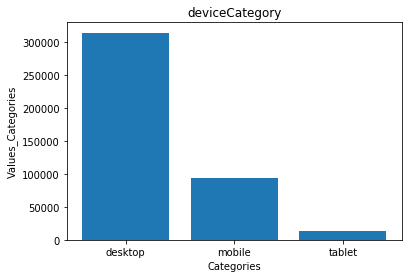

In [19]:
plt.bar(names,values)
plt.title('deviceCategory')
plt.xlabel('Categories')
plt.ylabel('Values_Categories')



### <span style="color:red"> The Desktop is Widely used by the users.</span>

### device category:- **desktopcategory** is max value and ***tablet*** is min  

### **OperatingSystem**

In [20]:
# device['operatingSystem'].value_counts().index.tolist()

In [21]:
bro_v = device.loc[(device['browser'] == 'Chrome') &(device['isMobile'] == False),'browser'].value_counts().tolist()
print('Max',device['browser'].value_counts().max())
print('mean',device['browser'].value_counts().mean())
print('mode',device['browser'].mode())
print('min',device['browser'].value_counts().min())
print('sum',device['browser'].value_counts().sum())
print('per:Chrome:- ',(device['browser'].value_counts().max())/(device['browser'].value_counts().sum())* 100 ,'%')



Max 288480
mean 8972.95744680851
mode 0    Chrome
dtype: object
min 1
sum 421729
per:Chrome:-  68.40411733601435 %


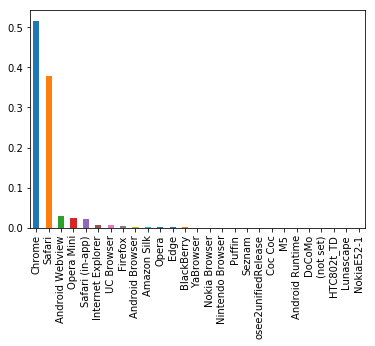

In [22]:
device.loc[device['isMobile'] == True,'browser'].value_counts(normalize=True).plot.bar()

In [23]:
#(device.loc[device['isMobile'] == False,'browser'].value_counts()/len(device['browser'])).plot.bar()
#device.loc[device['isMobile'] == False,'browser'].value_counts().sort_values(ascending=False).plot.bar()
# device.loc[device['isMobile'] == False,'browser'].value_counts().plot.bar()


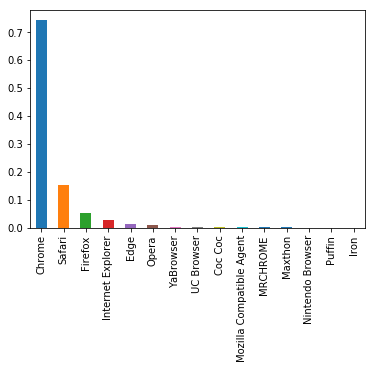

In [24]:
device.loc[device['isMobile'] == False,'browser'].value_counts(normalize=True).sort_values(ascending=False).head(15).plot.bar()


## Chrome is Widely used by the users 
#### Chrome , Safari, Firefox ,Internet Explorer , Edge and Opera 

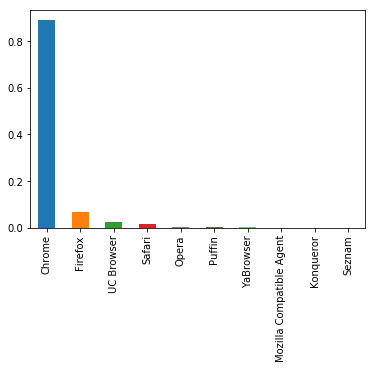

In [25]:
device.loc[(device['isMobile'] == False) & (device['operatingSystem'] == 'Linux'),'browser'].value_counts(normalize=True).head(15).sort_values(ascending=False).plot.bar()


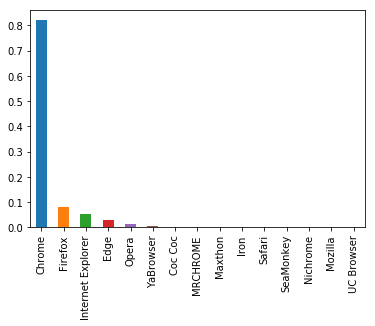

In [26]:
device.loc[(device['isMobile'] == False) & (device['operatingSystem'] == 'Windows'),'browser'].value_counts(normalize=True).head(15).sort_values(ascending=False).plot.bar()


In [27]:
device.loc[(device['isMobile'] == False) ,'operatingSystem'].value_counts().index.tolist()


['Windows',
 'Macintosh',
 'Linux',
 'Chrome OS',
 '(not set)',
 'Nintendo Wii',
 'Xbox',
 'iOS',
 'FreeBSD']

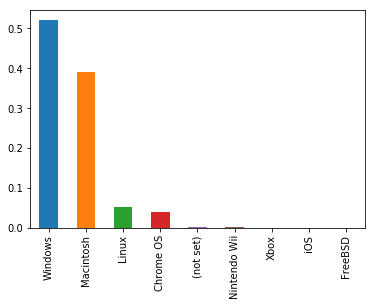

In [28]:
device.loc[(device['isMobile'] == False) ,'operatingSystem'].value_counts(normalize=True).sort_values(ascending=False).plot.bar()


In [29]:
device.loc[(device['isMobile'] == True) ,'operatingSystem'].value_counts().index.tolist()


['Android',
 'iOS',
 '(not set)',
 'Windows',
 'Windows Phone',
 'Samsung',
 'BlackBerry',
 'Firefox OS',
 'Nintendo WiiU',
 'Linux',
 'Macintosh',
 'NTT DoCoMo',
 'Nokia']

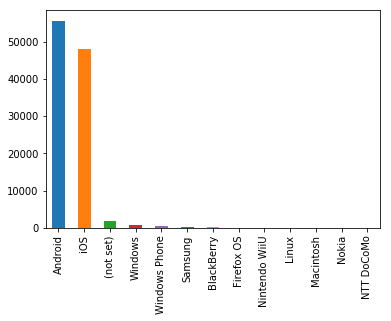

In [30]:
device.loc[(device['isMobile'] == True) ,'operatingSystem'].value_counts().sort_values(ascending=False).plot.bar()


In [31]:
geoNetwork = pd.DataFrame(train['geoNetwork'].apply(json.loads).tolist())
trafficSource = pd.DataFrame(train['trafficSource'].apply(json.loads).tolist())
totals = pd.DataFrame(train['totals'].apply(json.loads).tolist())


In [32]:
totals.head()

,bounces,hits,newVisits,pageviews,transactionRevenue,visits
0,1,1,1,1,NaN,1
1,1,1,1,1,NaN,1
2,1,1,1,1,NaN,1
3,1,1,1,1,NaN,1
4,1,1,NaN,1,NaN,1


In [33]:
train.shape

(421729, 12)

In [34]:
#not_null
421729- totals['transactionRevenue'].isnull().sum()

5383

In [35]:
totals['transactionRevenue']=totals['transactionRevenue'].fillna(0)

In [36]:
totals['transactionRevenue']= totals['transactionRevenue'].astype(int)

In [37]:
mean_totals= totals['transactionRevenue'].mean()
mean_total= round(mean_totals)

In [38]:
totals['transactionRevenue']=totals['transactionRevenue'].fillna(mean_total)

In [39]:
print(totals['transactionRevenue'].mean())
print(totals['transactionRevenue'].count())
print(totals['transactionRevenue'].max())
print(totals['transactionRevenue'].min())


1649543.569448627
421729
23129500000
0


In [40]:
totals['date']=train['date']

In [41]:
totals_copy=totals.copy()

In [42]:
totals_copy= totals_copy.set_index('date')

In [43]:
totals_copy['2016']['transactionRevenue'].describe()

count    2.252380e+05
mean     1.517845e+06
std      4.552114e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.602375e+10
Name: transactionRevenue, dtype: float64

In [44]:
totals_copy['2017']['transactionRevenue'].describe()

count    1.964910e+05
mean     1.800510e+06
std      6.137854e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.312950e+10
Name: transactionRevenue, dtype: float64

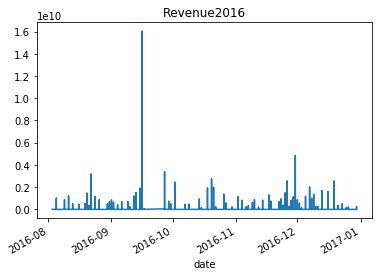

In [83]:
totals_copy['2016']['transactionRevenue'].plot(title='Revenue2016')

### max value _ revenue 2016 -> in 9/2016 

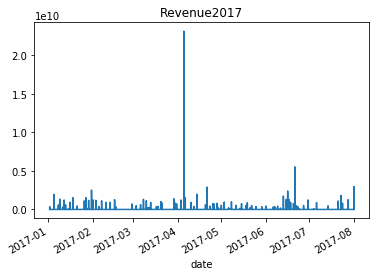

In [84]:
totals_copy['2017']['transactionRevenue'].plot(title='Revenue2017')

### Max_value revenues in 4/2017

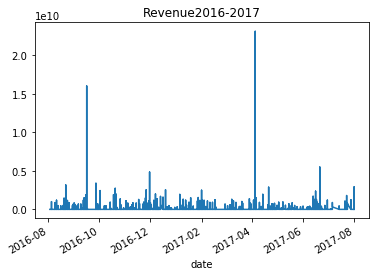

In [85]:
totals_copy['transactionRevenue'].plot(title='Revenue2016-2017')

In [46]:
# geoNetwork.head()

In [47]:
# trafficSource.head()

In [48]:
# trafficSource['adwordsClickInfo'].head()
#adwordsClickInfo = pd.DataFrame(trafficSource['adwordsClickInfo'].apply(json.loads).tolist())
#adwordsClickInfo.head()

In [49]:
train['fullVisitorId']= train['fullVisitorId'].astype(str)

In [50]:
train['fullVisitorId'].dtype

dtype('O')

In [51]:
train_copy = train.copy()

### fullVisitorId ,channelGrouping ,socialEngagementType

In [52]:
train_copy['fullVisitorId'].isnull().sum()

0

In [53]:
len(train_copy['fullVisitorId'])

421729

In [54]:
len(train_copy['fullVisitorId'].unique())

354456

In [55]:
#def between row , values unique
len(train_copy['fullVisitorId'])- len(train_copy['fullVisitorId'].unique())


67273

In [56]:
train_copy['channelGrouping'].unique().tolist()

['Organic Search',
 'Referral',
 'Paid Search',
 'Affiliates',
 'Direct',
 'Display',
 'Social',
 '(Other)']

In [57]:
train_copy.socialEngagementType.unique().tolist()

['Not Socially Engaged']

### socialEngagement ->>  Not Socially Engaged

In [58]:
train_copy['date']= pd.to_datetime(train_copy['date'],format='%Y%m%d')

In [59]:
train_copy['date'].isnull().sum()

0

In [60]:
train_copy['date'].dtype

dtype('<M8[ns]')

In [61]:
# train_copy['date'].value_counts().sort_values(ascending=False)

In [62]:
# train_copy['date'].sort_values()

In [63]:
train_copy['date'].max()

Timestamp('2017-08-01 00:00:00')

In [64]:
train_copy['date'].min()

Timestamp('2016-08-03 00:00:00')

In [65]:
train_copy_2 =train_copy.copy()

In [66]:
train_copy_2= train_copy_2.set_index('date')

In [67]:
# train_copy_2.head()

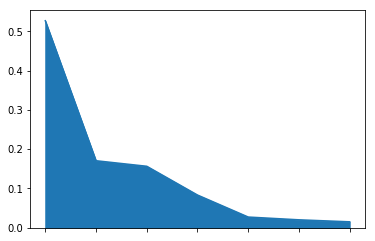

In [68]:
train_copy_2['channelGrouping']['2017-8'].value_counts(normalize=True).plot(kind='area')

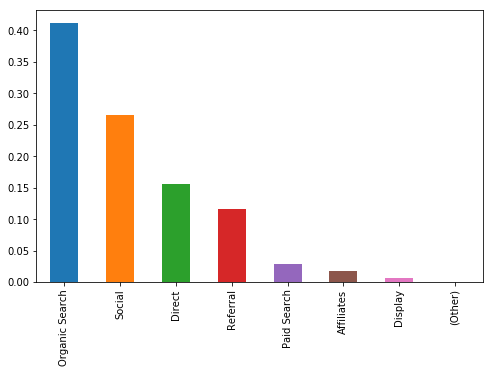

In [69]:
train_copy['channelGrouping'].value_counts(normalize=True).plot(kind='bar',figsize=(8,5))

#### Orgainic Search have max value channelGrouping

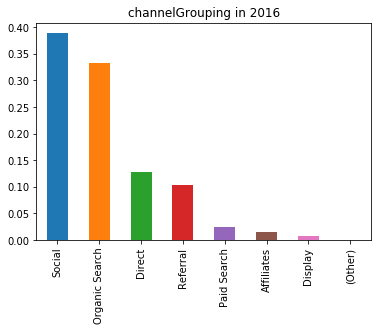

In [70]:
train_copy_2['2016']['channelGrouping'].value_counts(normalize=True).sort_values(ascending=False).plot(kind='bar',title='channelGrouping in 2016')

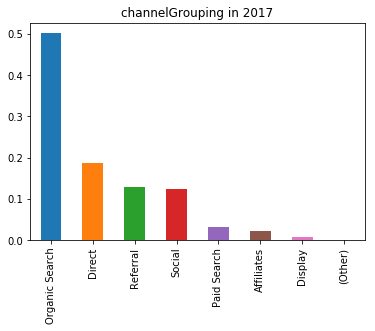

In [71]:
train_copy_2['2017']['channelGrouping'].value_counts(normalize=True).sort_values(ascending=False).plot(kind='bar',title='channelGrouping in 2017')

### orgnic search increase 2017 , social decrease ,  Direct > social (2017), social is first 2016 , orgnic search is fist 2017 

### **channelGrouping** ( 2017-8 , 2017-5,2017-1) 

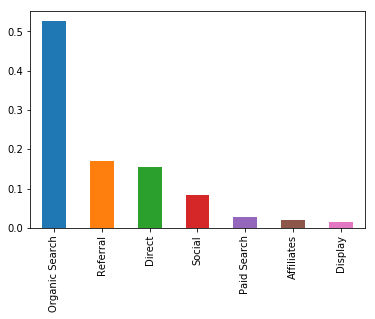

In [72]:
 train_copy_2['channelGrouping']['2017-8'].value_counts(normalize=True).sort_values(ascending=False).plot(kind='bar')

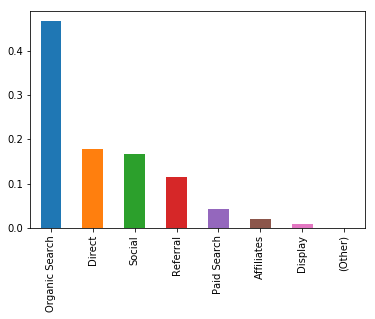

In [73]:
train_copy_2['channelGrouping']['2017-1'].value_counts(normalize=True).sort_values(ascending=False).plot(kind='bar')

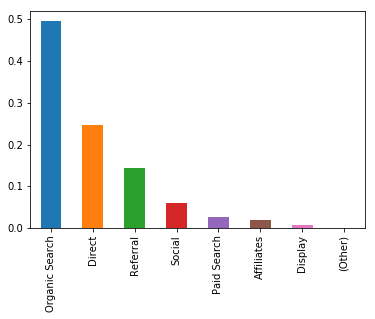

In [74]:
train_copy_2['channelGrouping']['2017-5'].value_counts(normalize=True).sort_values(ascending=False).plot(kind='bar')

### max_value Organic search  , min_value Display

In [75]:
train_c3 =train_copy.copy()

In [76]:
train_c3= train_c3.set_index(['date','channelGrouping'])

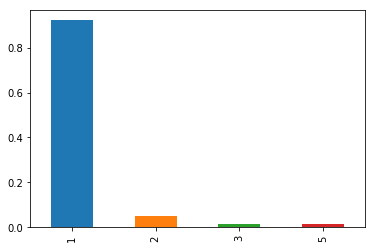

In [77]:
train_c3.loc[['2016','Organic Search']]['visitNumber'].value_counts(normalize=True).sort_values(ascending=False).plot(kind='bar')


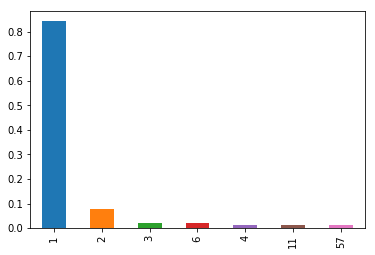

In [78]:
train_c3.loc[['2017','Organic Search']]['visitNumber'].value_counts(normalize=True).sort_values(ascending=False).plot(kind='bar')


#### 2016 -> max_visitNum (5) across -> OS , 2017 Max_Num->57.


In [79]:

# train_c3.loc[(['','Other'])]['visitNumber'].value_counts(normalize=True).sort_values(ascending=False).plot(kind='bar')


### 'pp' -> chanal 'pp' 